# Objectives and Data Exploration

## Table of Contents
  * 1. [Objectives](#Objectives)
  * 2. [Imports](#Imports)
  * 3. [Data Overview](#Data_overview)
  * 4. [Data Exploration](#Explore_data)
     * 4.1. [Physiological Data](#Physiological_data)
         * 4.1.1 [ECG Data and ML](#ECG_ML)
         * 4.1.2 [P1 Feature](#P1_feature)
           * 4.1.2.1 [Fourier Analysis](#Fourier_analysis)
           * 4.1.2.2 [Butterworth Bandpass Filter](#BBF)
         * 4.1.3 [P7 Feature](#P7_feature)
     * 4.2. [Environmental Data](#Environmental_data)  
     * 4.3. [Vehicular Data](#Vehicular_data)
       * 4.3.1 [V6 and V8 Features](#V6V8_features)
  * 5. [Data Composition Summary](#Data_composition)

## 1. Objectives<a id='Objectives'></a>

The objective of this project is to design a classifier capable of accurately predicting driver alertness using multi-modal data.

The FordChallenge dataset is obtained from Kaggle and consists of data from 600 real-time driving sessions, each lasting approximately 2 minutes and sampled at 100ms intervals [1] (i.e., a sampling rate of 10 Hz). These sessions include trials from 100 drivers of varying ages and genders, with specific details such as names and units undisclosed by the challenge organizers. Each data point is labeled with a binary outcome: 0 for **"distracted"** and 1 for **"alert"**. The dataset contains **physiological**, **environmental**, and **vehicular** measurements.

[1] Mahmoud Abou-Nasr. (2011). Stay Alert! The Ford Challenge. https://kaggle.com/competitions/stayalert. Kaggle.


While the feature labels are removed, one can infer potential feature meanings by examining correlations, distributions, and their temporal patterns. Furthermore, one can still train and evaluate models to assess their predictive performance without explicit feature names. The table below lists some possible feature labels.

| **Modality**           | **Data Type / Examples**                                                                             | **Purpose / What It Tells Us**                                                                                                          |
| ---------------------- | ---------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| **Physiological data** | Heart rate (HR), heart rate variability (HRV), EEG, EDA (skin conductance), eye movement, facial EMG | Reflects the **driver’s internal state** — stress, fatigue, attention, emotional arousal.                                               |
| **Environmental data** | Road type, weather, lighting, traffic density, noise level, GPS location                             | Provides **context** — external factors influencing driving behavior or risk.                                                           |
| **Vehicular data**     | Speed, acceleration, steering angle, brake pressure, lane position, throttle input                   | Captures how the **vehicle behaves** and how the **driver interacts** with it — can reveal distraction, fatigue, or aggressive driving. |

## 2. Imports<a id='Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt
#from sb_utils import save_file
pd.options.mode.copy_on_write = True

## 3. Data Overview<a id='Data_overview'></a>

In [2]:
raw_data = np.loadtxt('FordChallenge_X.csv', delimiter=',')
y = np.loadtxt('FordChallenge_y.csv', delimiter=',')

### Data Shape

In [3]:
print('shape of X: ',raw_data.shape)
print('shape of y: ', y.shape)

shape of X:  (36257, 1200)
shape of y:  (36257,)


### Data Summary

In [4]:
print(f'The dataset consists of {raw_data.shape[0]} multivariate time series.') 
print('Each time series is of length 40, representing 4 seconds of data per time series at 10 Hz.')

data = raw_data.reshape(raw_data.shape[0], int(raw_data[0].shape[0]/40), 40)
print(f'At each timestamp, the data includes {data[0].shape[0]} (8 physiological, 11 environmental, and 11 vehicular) measurements.')

The dataset consists of 36257 multivariate time series.
Each time series is of length 40, representing 4 seconds of data per time series at 10 Hz.
At each timestamp, the data includes 30 (8 physiological, 11 environmental, and 11 vehicular) measurements.


### Class Imbalance 

In [5]:
ind_dist = np.where(y ==0)
distracted = data[ind_dist]
ind_aler = np.where(y==1)
alert = data[ind_aler]
print(f'The dataset is imbalanced, with only {len(distracted)/len(data)*100:.3f}% of instances labeled as "distracted"')

The dataset is imbalanced, with only 36.498% of instances labeled as "distracted"


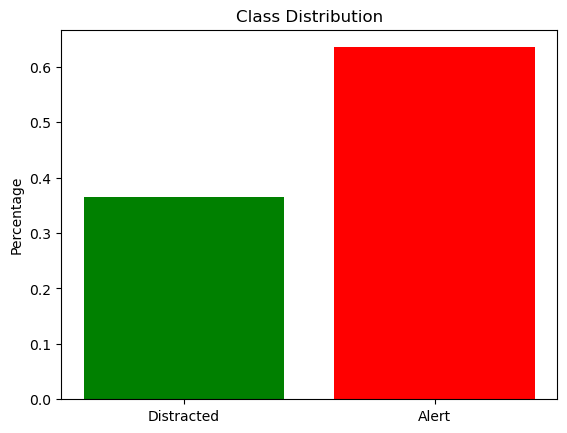

In [9]:
r_distr=len(distracted)/len(data)
r_alert=1-r_distr
ratios = [r_distr, r_alert]
categories =['Distracted','Alert']

plt.bar(categories, ratios, color=['green', 'red'])
plt.title('Class Distribution')
plt.ylabel('Percentage')
plt.savefig("data_imbalance.png") 
plt.show()

### Strategies to Mitigate Data Imbalance
- Class weighting (loss rebalancing) <br>
    [Ex]: inverse frequency weighting <br>
    **weights = torch.tensor([1.0, 7_000 / 3_000])**  // [alert, distracted] <br>
    **criterion = CrossEntropyLoss(weight=weights)**
- Data augmentation for time series / sensor data: jittering, scaling, time-warping
- Oversample minority class (e.g., with SMOTE (Synthetic Minority Over-sampling Technique), random duplication) <br>
  or Undersample majority class (drop some samples) <br>
    [Ex] **from imblearn.over_sampling import SMOTE,RandomOverSampler,RandomUnderSampler**
- Focal loss: a loss function that focuses more on hard-to-classify examples.<br>
    [Ex] **loss = -(1 - p_t) ** γ * log(p_t)** <br>

| Strategy                         | Description                      | When to Use                            |
| -------------------------------- | -------------------------------- | -------------------------------------- |
| **Class weighting**              | Adjusts loss function importance | Works well for transformer classifiers |
| **Oversampling / Undersampling** | Balances dataset size            | Small or tabular/time-series datasets  |
| **Data augmentation**            | Generates new minority examples  | Text, image, or sensor modalities      |
| **Focal loss**                   | Focuses on hard examples         | For high imbalance ratios              |
| **Metric choice**                | Evaluates fairly                 | Always!                                |


## 4. Data Exploration<a id='Explore_data'></a>

Let's plot features for 'distracted' and 'alert' labels separately.

In [11]:
def plot_series(fea, axes):
    for idx in series_indices:
        tseries_dist = distracted[idx, fea, :]
        tseries_alert = alert[idx,fea, :]
        axes[0].plot(tseries_dist,label=f'{idx}')
        axes[1].plot(tseries_alert,label=f'{idx}')

In [12]:
# Define series window
series_indices = [ i for i in range(10)]

### 4.1  Physiological Data <a id='Physiological_data'></a>

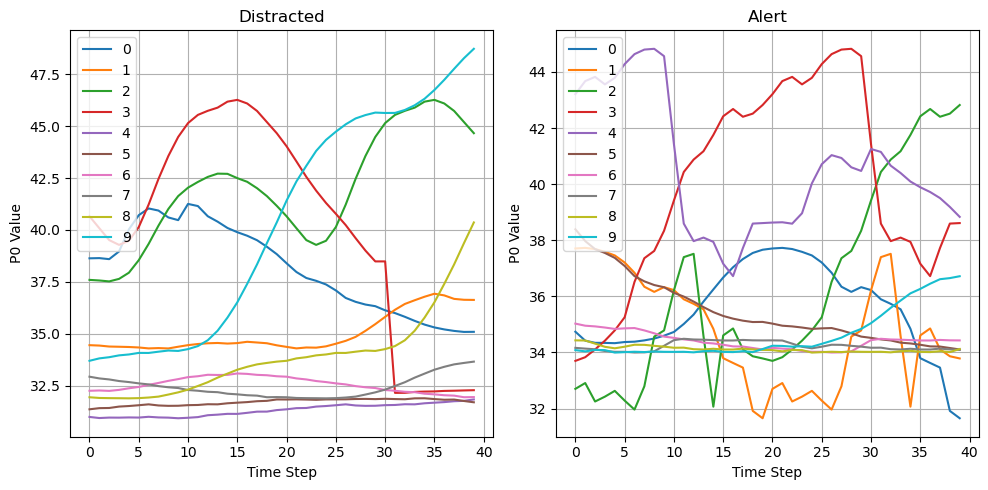

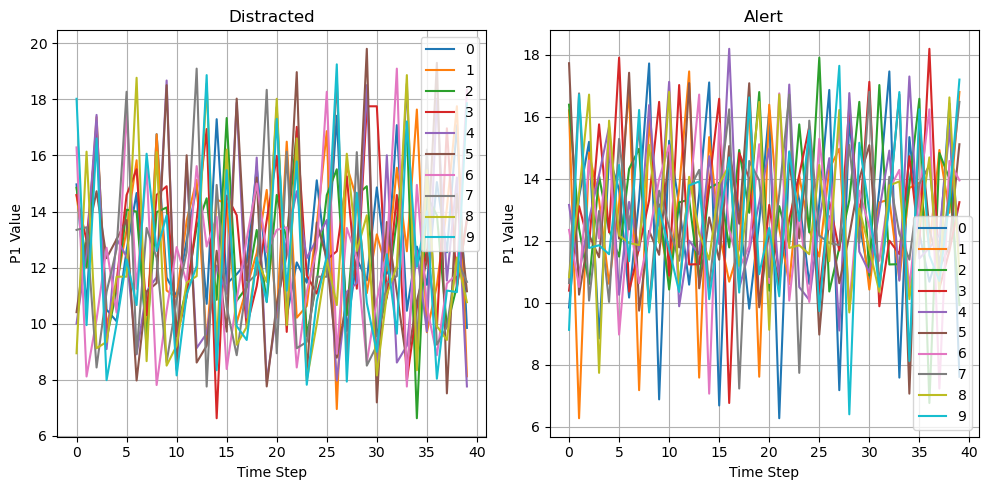

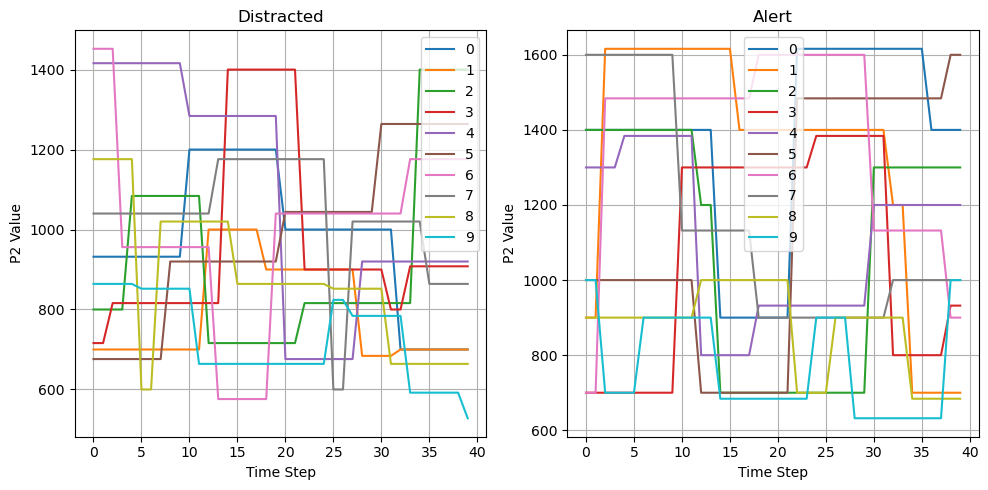

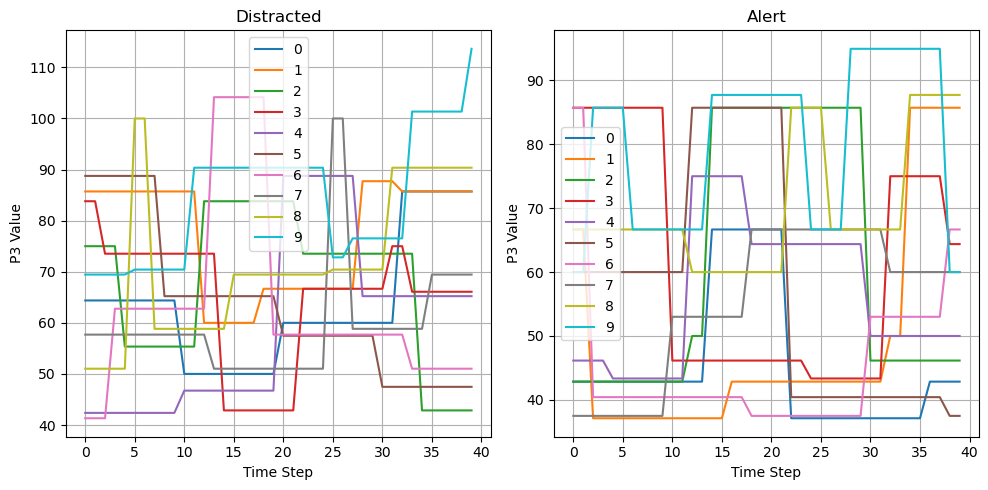

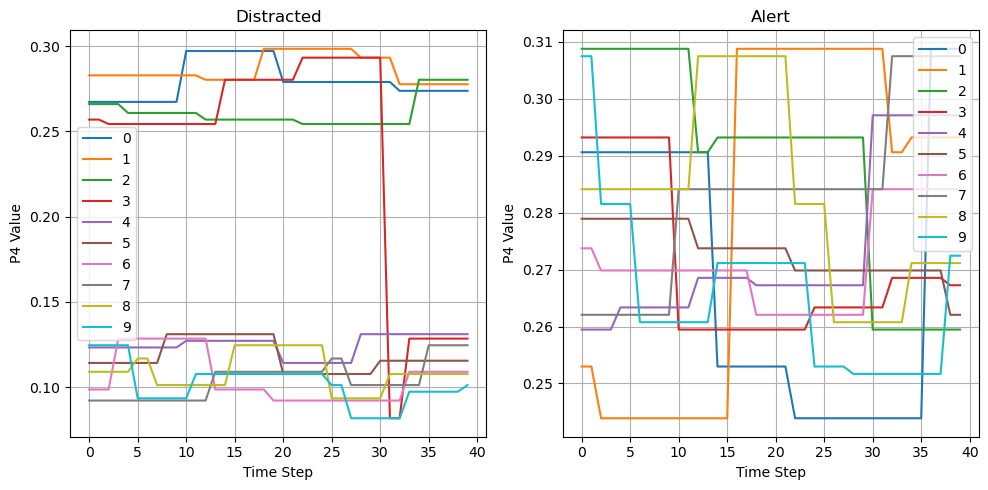

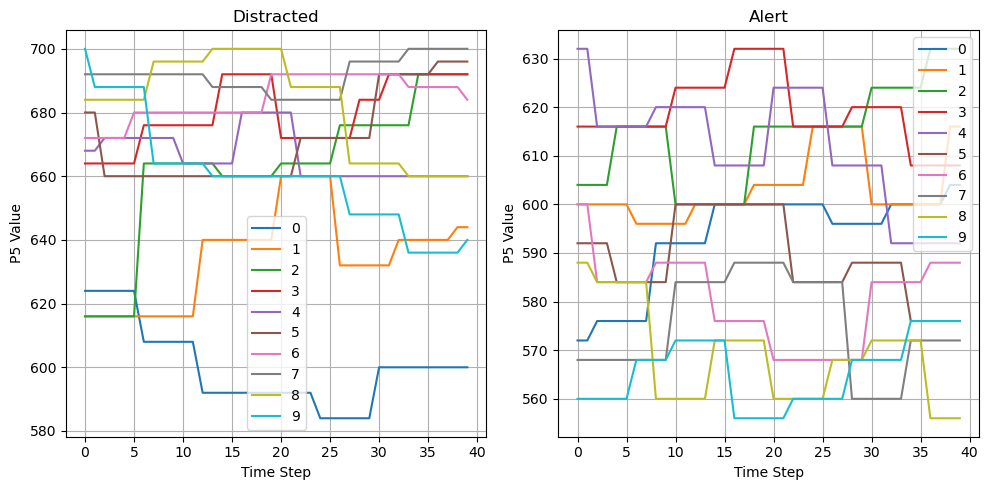

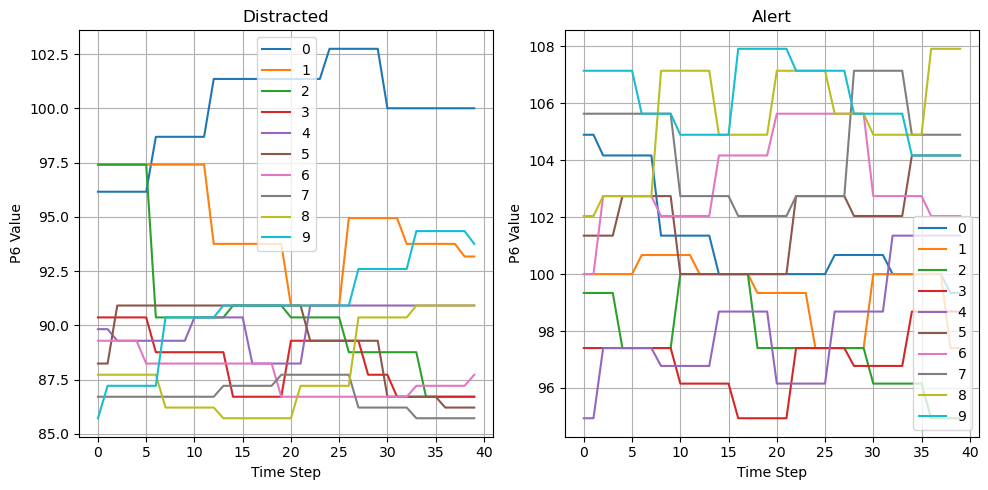

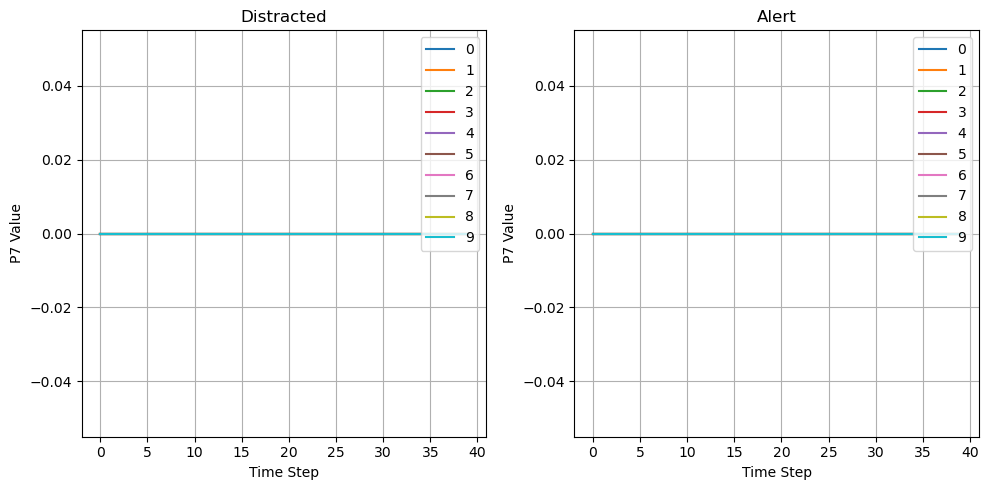

In [14]:
# feature names and indicies
feature_names = ['P'+str(l) for l in range(8)]
feature_indices = [k for k in range(8)]

for idx in range(len(feature_indices)):
    fig, axes = plt.subplots(1,2,figsize=(10, 5))
    axes[0].set_title('Distracted')
    axes[1].set_title('Alert')
    plot_series(feature_indices[idx],axes)
    for j in [0,1]:
        axes[j].set_xlabel('Time Step')
        axes[j].set_ylabel(f'{feature_names[idx]} Value')
        axes[j].legend()
        axes[j].grid(True)
    plt.tight_layout()
    plt.savefig(f"physiological_{idx}.png")    
    plt.show()

### 4.1.1 ECG Data and ML <a id='ECG_ML'></a>

ECG signals are typically 1D waveforms recorded over time that represent the heart’s electrical activity.
Converting these signals into *clean, normalized,* and meaningful *numerical* representations for model training can potentially enhance model performance.

- Signal cleaning and filtering 
  * Baseline wander (slow drift) 0.5 Hz <br>
  * High-frequency noise (muscle, power line) 45-60 Hz <br> 
  * Artifacts (movement, poor electrodes) <br>
  
- Normalization / Standardization for stability across people and devices
  
- Use filtered + normalized signals <br>
  Optionally compute derived representations: 
    * Spectrograms (Short-Time Fourier Transform) <br>
    * Wavelet transforms <br>
    * Heartbeats centered around R-peaks (for CNN classification)

In our data: 
- Sampling frequency (fs) = **10 Hz**
- Therefore, **Nyquist frequency** = fs / 2 = **5** Hz
→ This means you cannot represent or filter frequencies above 5 Hz (they will alias).

### 4.1.2 P1 Feature <a id='P1_feature'></a>

The P1 data appears to consist of high-frequency signals and it is challenging to distinguish between the two states. First, Fourier analysis will be applied to examine the frequency components. Next, a Butterworth bandpass filter will be applied to remove low-frequency components, and the resulting filtered time series distributions for the two classes will be compared.

#### 4.1.2.1 Fourier Analysis <a id='Fourier_analysis'></a>

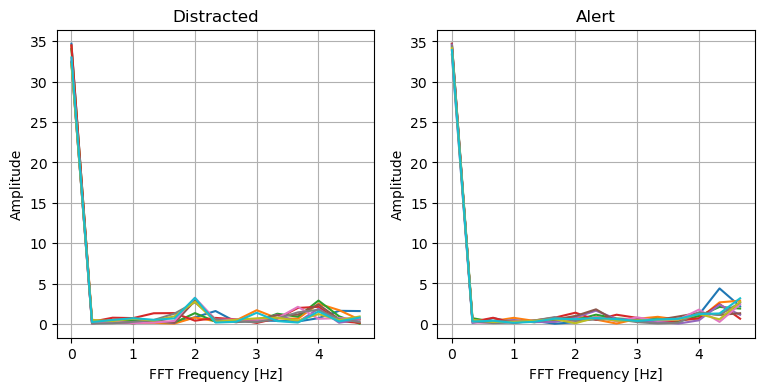

In [15]:
fig1, bx= plt.subplots(1,2, figsize=(9, 4))

fs=10
N=30 # FFT frequency bins
for idx in range(10):
    tseries_dist = distracted[idx, 1, :]
    tseries_alert = alert[idx,1, :]

    # Compute FFT
    freq_dist = np.fft.fftfreq(N, d=1/fs)       # frequency bins
    positive_freqs = freq_dist[:N//2]           # Take only the positive frequencies
    fftval_dist = np.fft.fft(tseries_dist)      # complex FFT result
    fftval_aler = np.fft.fft(tseries_alert)

    fft_dist = np.abs(fftval_dist[:N//2]) * 2 / N  # normalize magnitude
    fft_aler = np.abs(fftval_aler[:N//2]) * 2 / N
    bx[0].plot(positive_freqs,fft_dist,label='distracted '+str(idx))
    bx[1].plot(positive_freqs,fft_aler,label='alert '+str(idx))

for i in [0,1]:
    bx[0].set_title("Distracted")
    bx[1].set_title("Alert")
    bx[i].set_xlabel('FFT Frequency [Hz]')
    bx[i].set_ylabel('Amplitude')
    bx[i].grid(True)
fig1.savefig('fftP1.png')

- **The peak frequencies differ between the two classes, suggesting that the frequency distribution could serve as a valuable feature.**
- **It is also worth noting that frequencies below 0.3 Hz are identical between the two classes and can therefore be removed.**

#### 4.1.2.2 Butterworth Bandpass Filter <a id='BBF'></a>

In [17]:
from scipy.signal import butter, filtfilt, freqz

# Bandpass filter (0.3–4.8 Hz) — keeps heart-relevant frequencies 
order=4
low,high = 0.3,fs/2*0.96

def bandpass_filter(signal, fs=fs, low=low, high=high, order=order):
    nyq = 0.5 * fs
    b, a = butter(order, [low/nyq, high/nyq], btype='band')
    return filtfilt(b, a, signal)

def get_frequencies(signal, fs=fs, low=low, high=high, order=order):
    nyq = 0.5 * fs    
    b, a = butter(order, [low/nyq, high/nyq], btype='band')
    # Compute frequency response
    w, h = freqz(b, a, worN=8000)
    freq = (w / np.pi) * nyq  # Convert from rad/sample to Hz    
    return freq, h

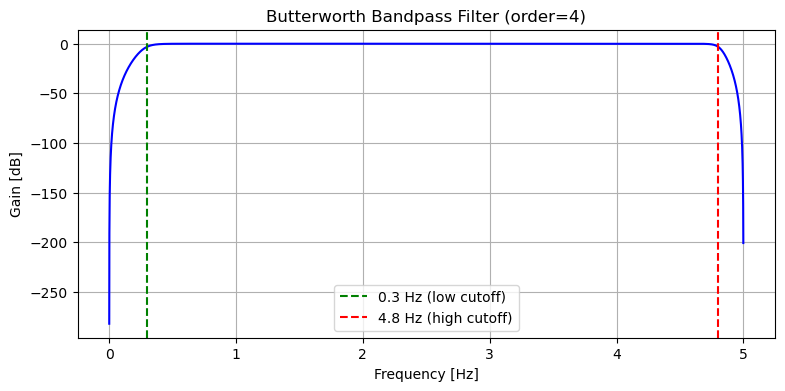

In [18]:
fig2, ax= plt.subplots(figsize=(9, 4))

# Bandpass filter
filtered_dist = bandpass_filter(tseries_dist)
filtered_alert = bandpass_filter(tseries_alert)
    
freq_dist,h = get_frequencies(tseries_dist)
freq_aler,h = get_frequencies(tseries_alert)
ax.plot(freq_dist, 20 * np.log10(abs(h)), 'b')
#ax.plot(freq_aler, 20 * np.log10(abs(h)), 'g')

ax.set_title(f'Butterworth Bandpass Filter (order={order})')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Gain [dB]')
ax.grid(True)
ax.axvline(low, color='green', linestyle='--', label=f'{low} Hz (low cutoff)')
ax.axvline(high, color='red', linestyle='--', label=f'{high} Hz (high cutoff)')
ax.legend()
fig2.savefig('butterworth.png')

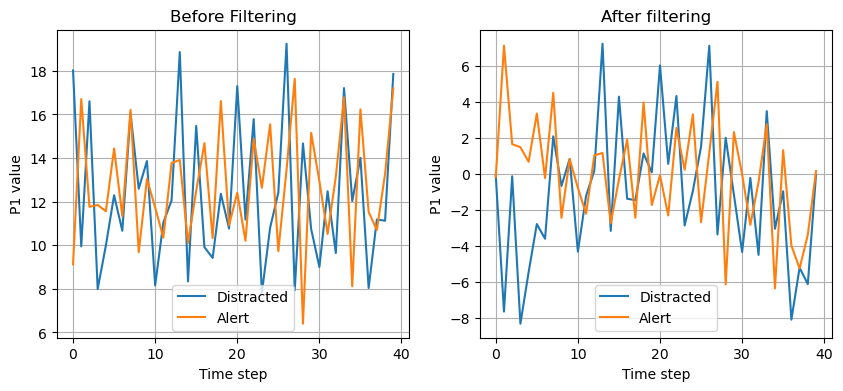

In [20]:
fig, axes =plt.subplots(1,2,figsize=(10,4))
axes[0].plot(tseries_dist,label='Distracted')
axes[0].plot(tseries_alert,label='Alert')
axes[0].set_title("Before Filtering")
axes[1].plot(filtered_dist, label='Distracted')
axes[1].plot(filtered_alert, label='Alert')
axes[1].set_title("After filtering")
for i in [0,1]:
    axes[i].set_xlabel('Time step')
    axes[i].set_ylabel('P1 value')
    axes[i].grid(True)
    axes[i].legend()
fig.savefig('after_fft.png')

### 4.1.3  P7 Feature <a id='P7_feature'></a>

In [14]:
p7_dist = tseries_dist = distracted[:, 7, :]
print(len(p7_dist[p7_dist != 0.]))
p7_alert = tseries_alert = alert[:, 7, :]
print(len(p7_alert[p7_alert != 0.]))

0
0


- **P7 feature is always zero.** 

### 4.2  Environmental Data <a id='Environmental_data'></a>

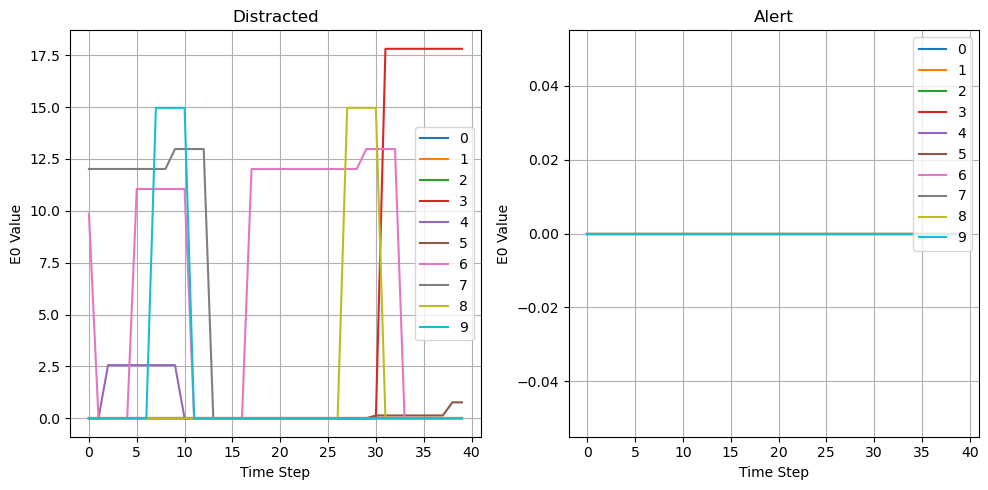

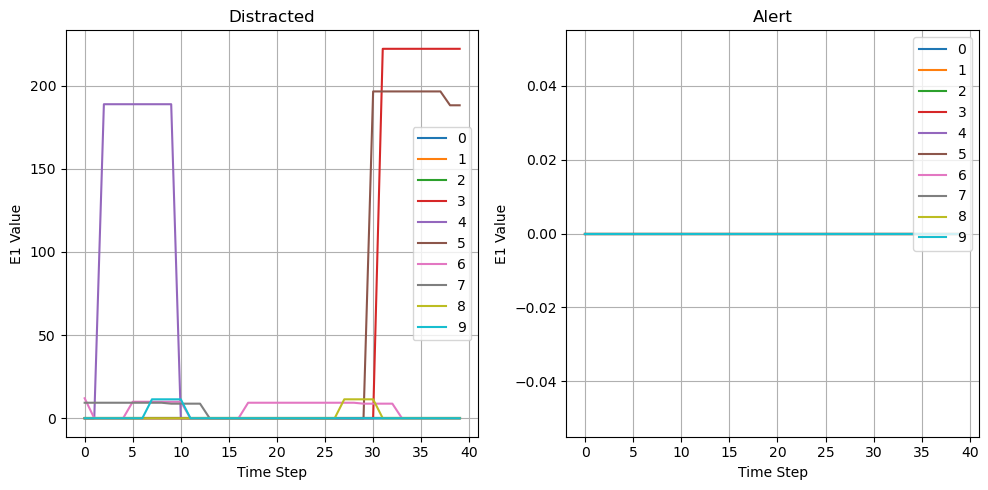

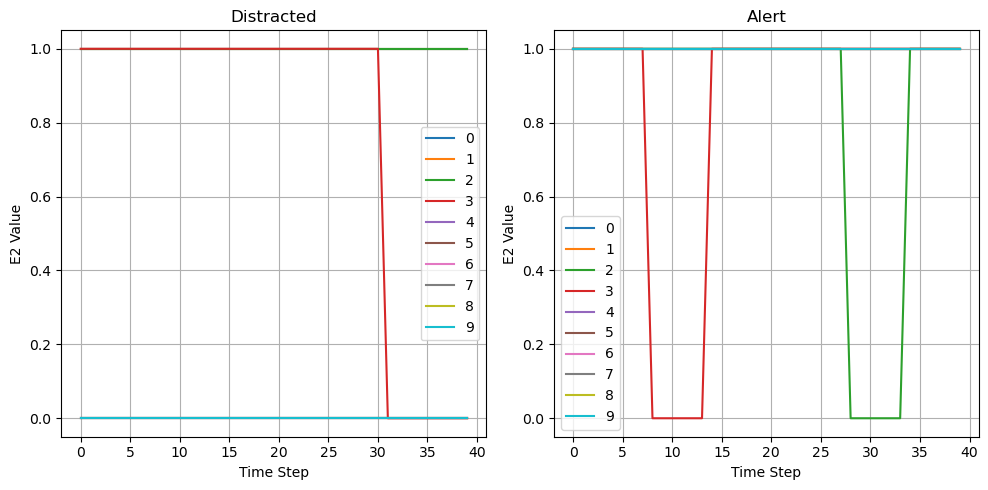

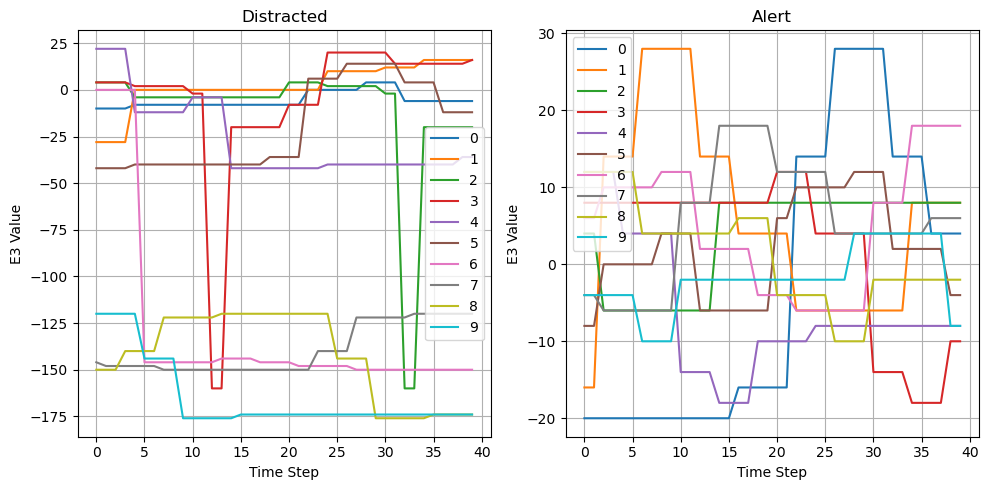

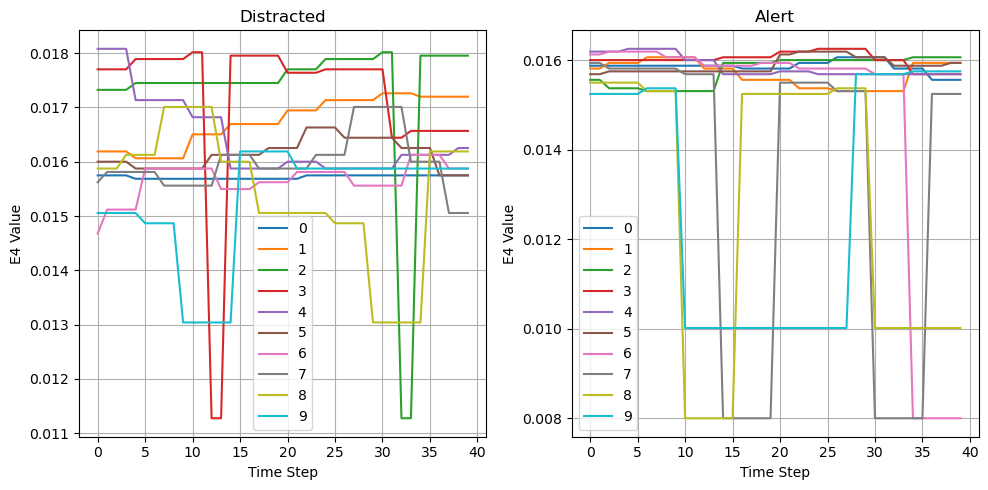

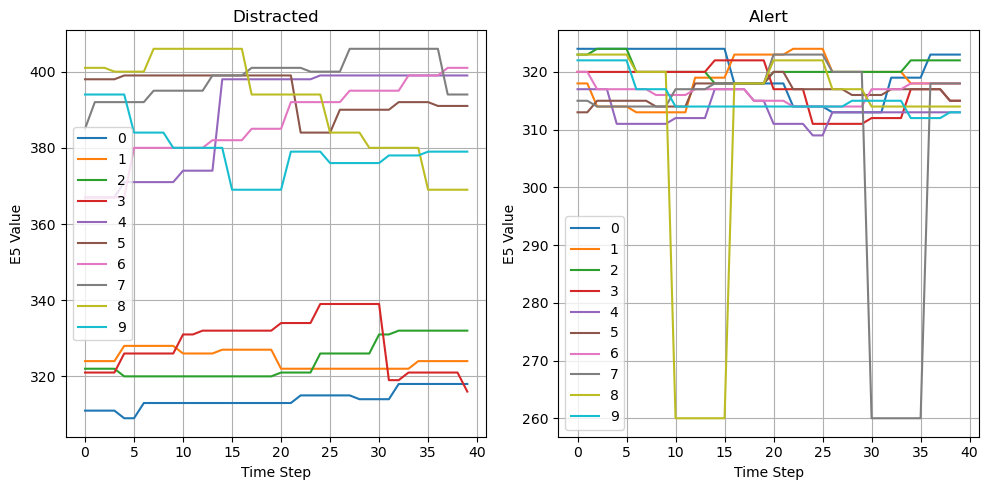

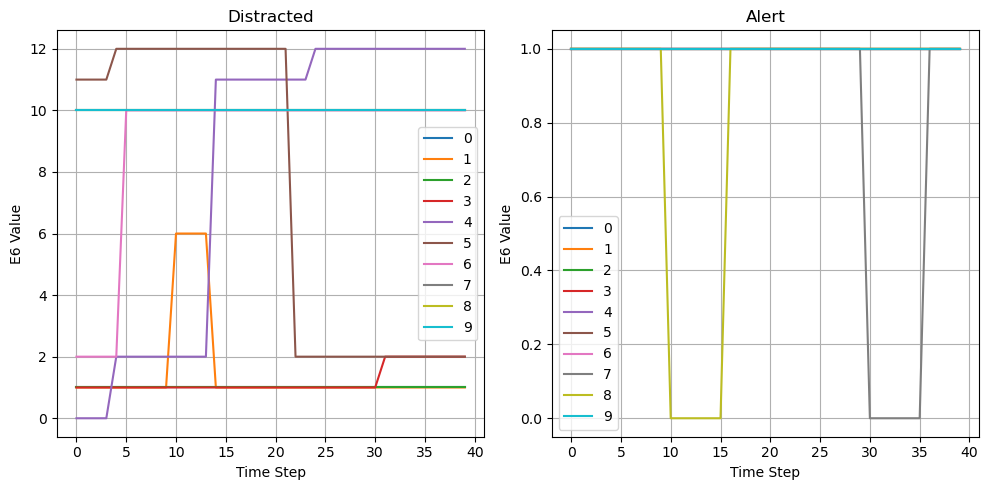

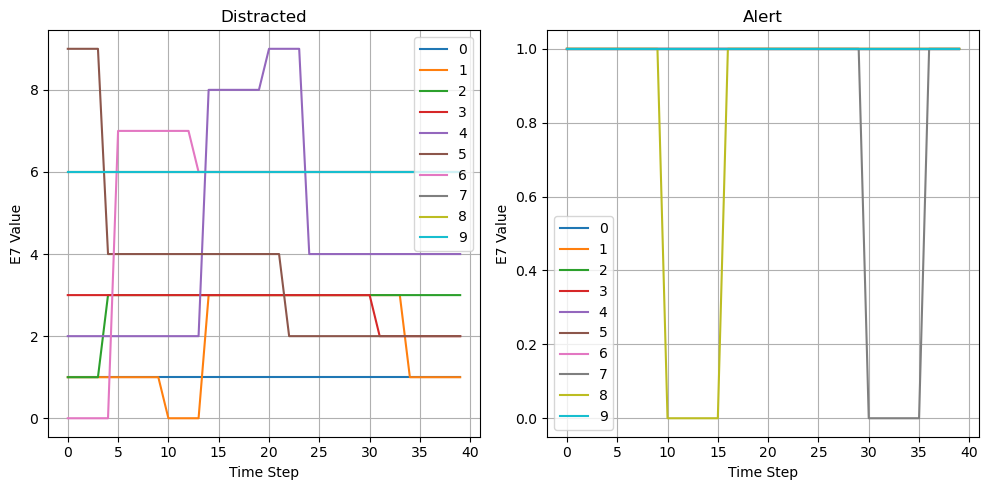

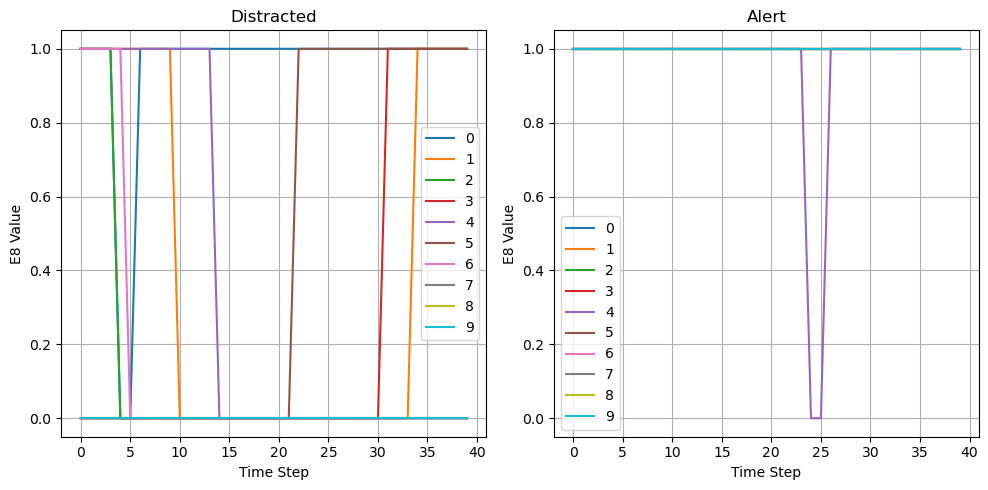

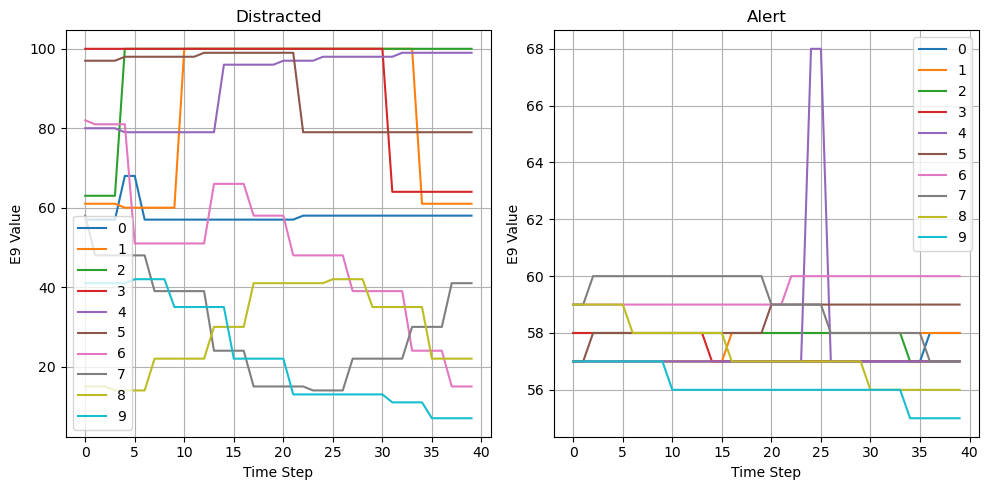

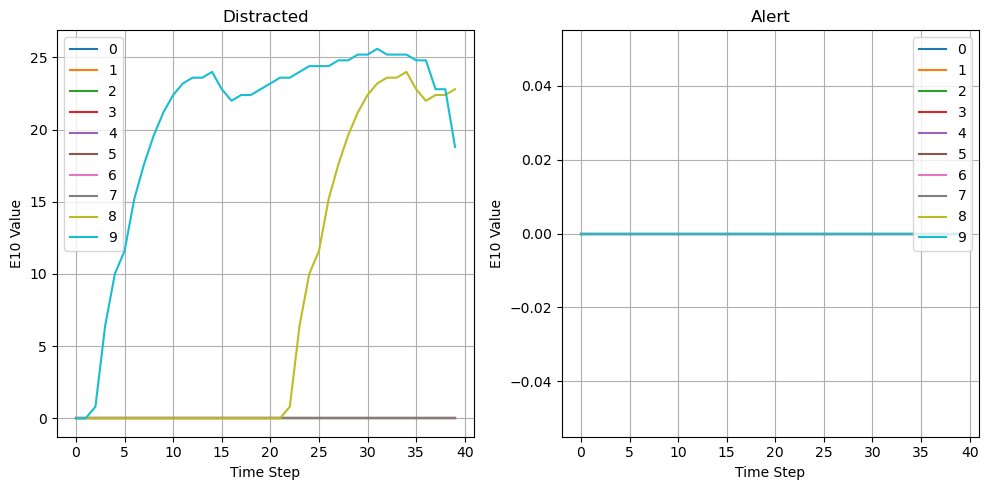

In [21]:
# feature names and indicies
feature_names = ['E'+str(l) for l in range(11)]
feature_indices = [k+8 for k in range(11)]

for idx in range(len(feature_indices)):
    fig, axes = plt.subplots(1,2,figsize=(10, 5))
    axes[0].set_title('Distracted')
    axes[1].set_title('Alert')
    plot_series(feature_indices[idx],axes)
    for j in [0,1]:
        axes[j].set_xlabel('Time Step')
        axes[j].set_ylabel(f'{feature_names[idx]} Value')
        axes[j].legend()
        axes[j].grid(True)
    plt.tight_layout()
    plt.savefig(f'environmental_{idx}.png')
    plt.show()

- **Most of the environmental data exhibit step-like values, and some signals differ distinctly between the two classes.** 
- **E2 and E8 are binary categorical variables.**

### 4.3  Vehicular Data <a id='Vehicular_data'></a>

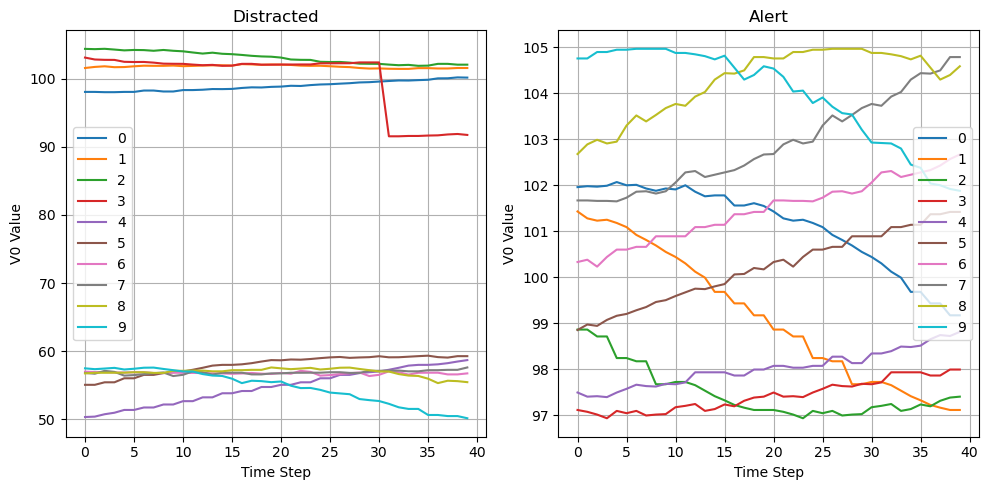

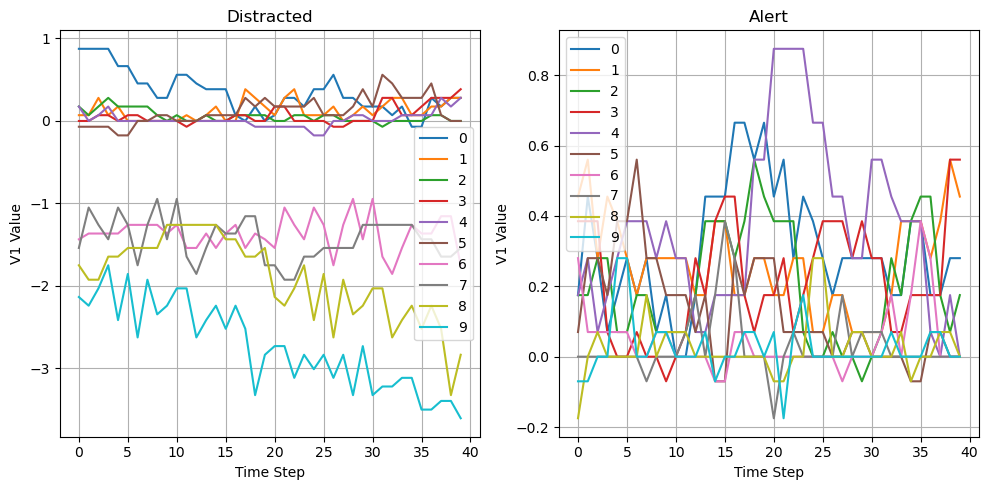

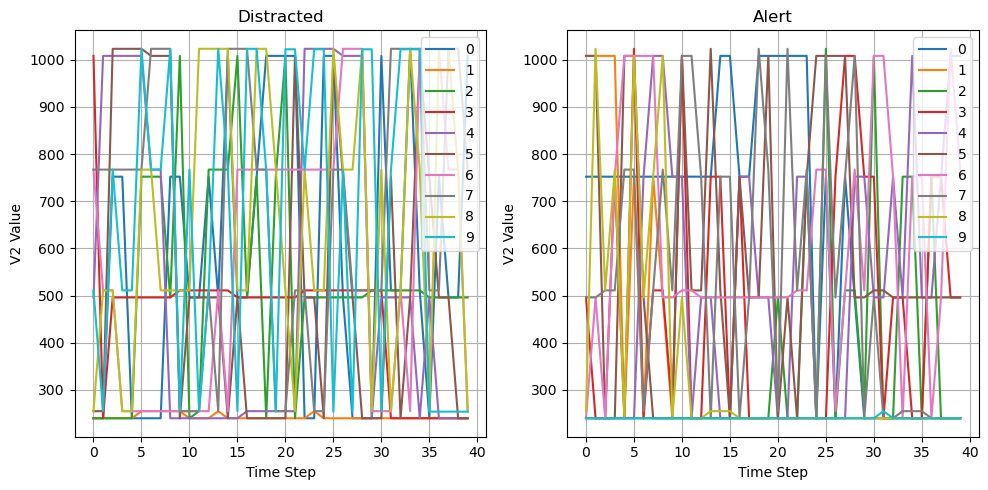

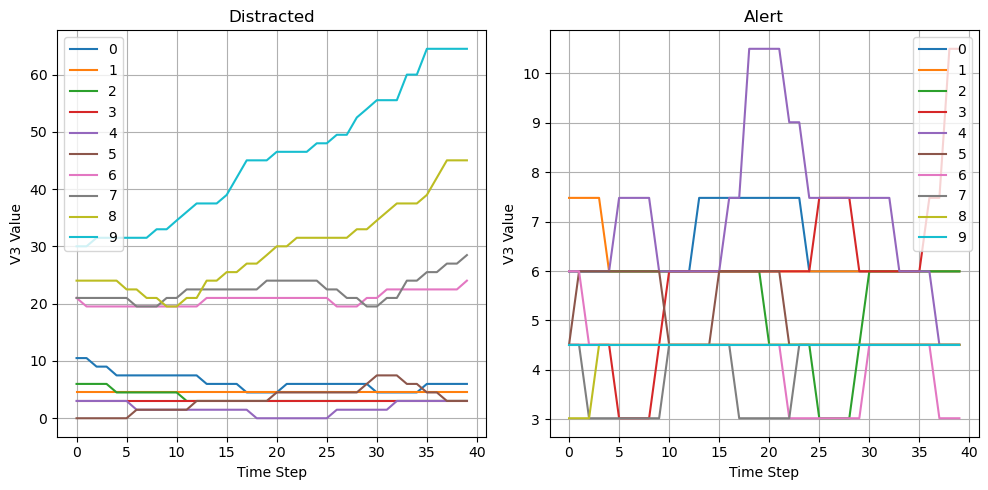

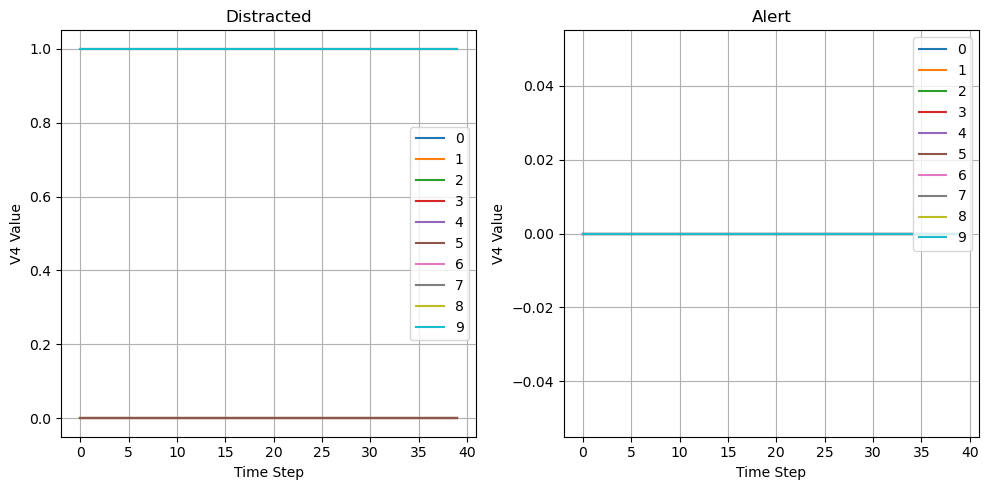

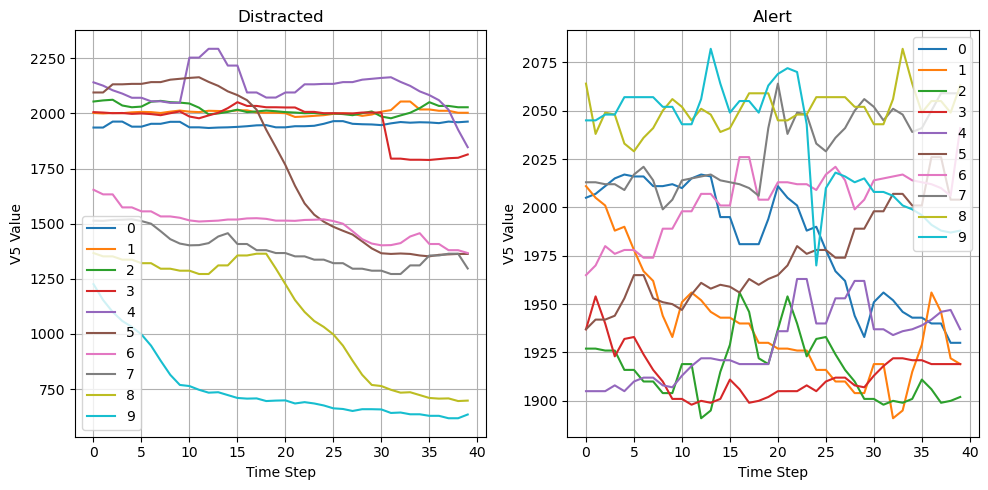

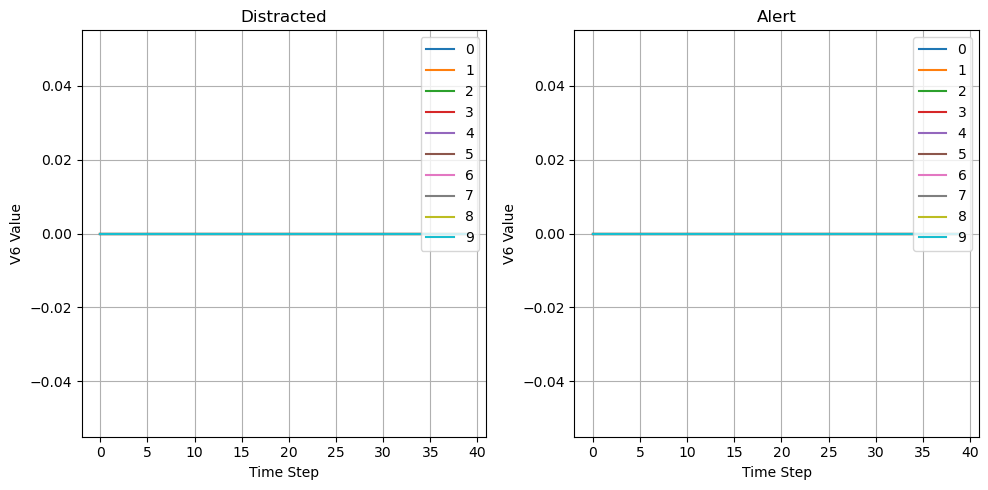

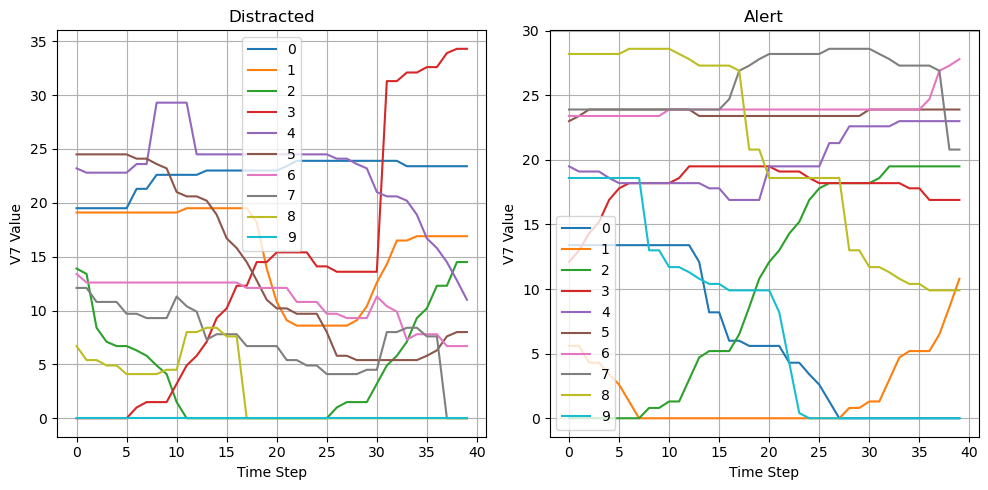

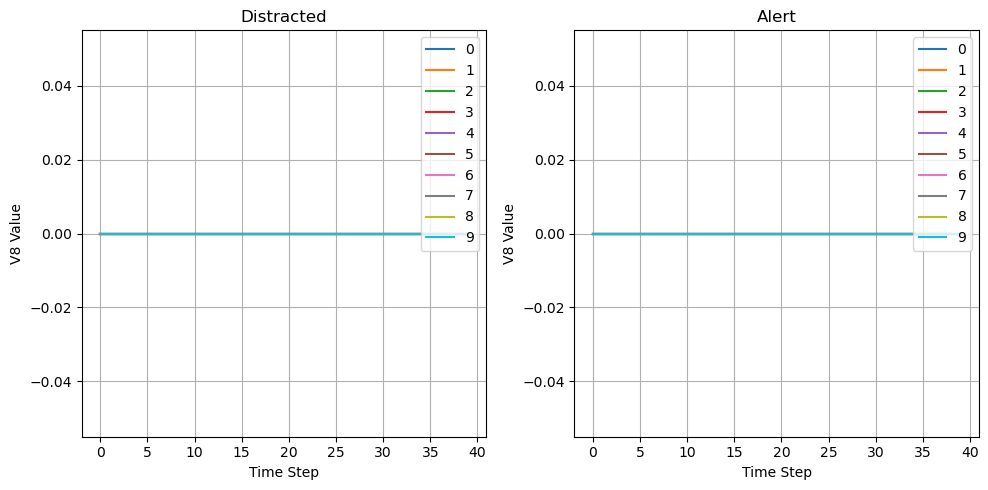

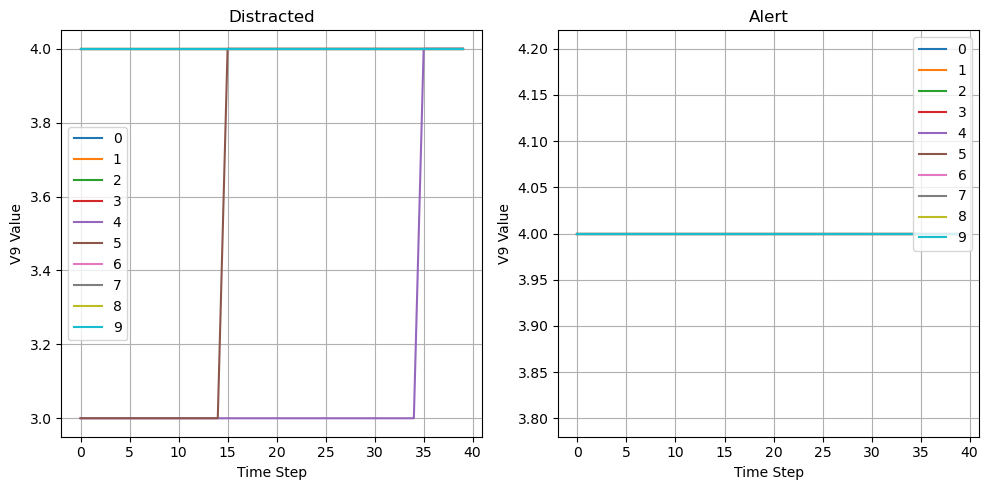

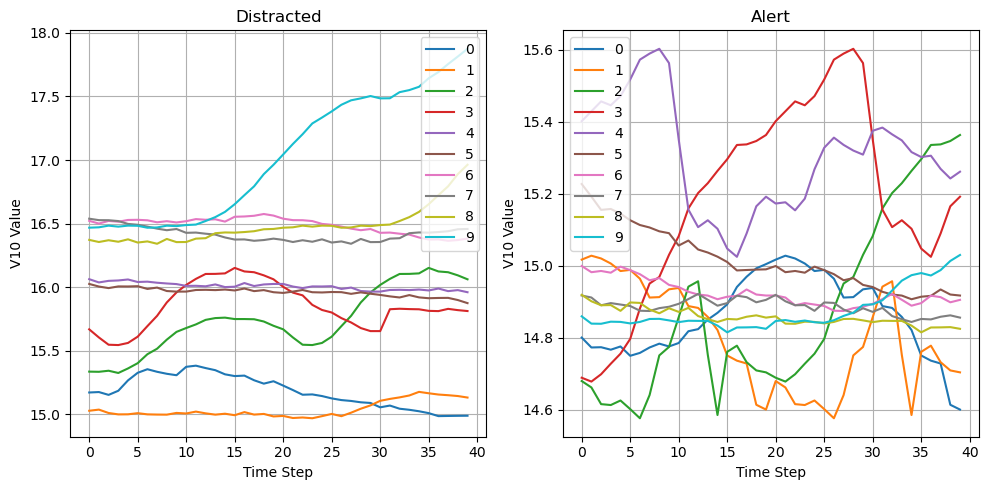

In [22]:
# feature names and indicies
feature_names = ['V'+str(l) for l in range(11)]
feature_indices = [k+8+11 for k in range(11)]

for idx in range(len(feature_indices)):
    fig, axes = plt.subplots(1,2,figsize=(10, 5))
    axes[0].set_title('Distracted')
    axes[1].set_title('Alert')
    plot_series(feature_indices[idx],axes)
    for j in [0,1]:
        axes[j].set_xlabel('Time Step')
        axes[j].set_ylabel(f'{feature_names[idx]} Value')
        axes[j].legend()
        axes[j].grid(True)
    plt.tight_layout()
    plt.savefig(f'vehicular_{idx}.png')
    plt.show()

- **V4 is a binary variable.**

### 4.3.1  V6 and V8 Features <a id='V6V8_features'></a> 

In [17]:
v6_dist = tseries_dist = distracted[:, 25, :]
print(len(v6_dist[v6_dist != 0.]))
v6_alert = tseries_alert = alert[:, 25, :]
print(len(v6_alert[v6_alert != 0.]))
v8_dist = tseries_dist = distracted[:, 27, :]
print(len(v8_dist[v8_dist != 0.]))
v8_alert = tseries_alert = alert[:, 27, :]
print(len(v8_alert[v8_alert != 0.]))

0
0
0
0


- **V6 and V8 are always zero.** 

## 5. Data Composition Summary <a id='Data_composition'></a>

- In the physiological dataset, **five** variables exhibit *step-wise* patterns, **one** (P0) shows *continuous* pattern, **one** (P1) represents a high-frequency electrical signal, and *one* (P7) remains constant at zero.
- The environmental dataset consists of **eight** *step-wise* variables, **two** (E2, E8) *binary categorical* variables, and **one** *continuous* (E10) variable.
- The vehicular dataset contains **five** *continuous* variables, **two** (V3, V9) *step-wise* variables, **one** (V2) *discrete* variable, **one** *binary* (V4) variable, and **two** (V6, V8) are always **zero**.